In [206]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [197]:
data=pd.read_csv('///home/kunal/Downloads/bollywood-1.csv')
data.drop_duplicates(subset='ReleaseTime')
replacedata={
    "LW":"1",
    "N":"2",
    "HS":"3",
    "FS":"4"
}
#data= data.replace({"ReleaseTime": replacedata})
frequency = data['ReleaseTime'].value_counts()
frequency.sort_values(ascending=False)
print(frequency)

N     99
HS    18
FS    17
LW    15
Name: ReleaseTime, dtype: int64


In [198]:
print(data)

     SlNo Release Date                    MovieName ReleaseTime      Genre  \
0       1    18-Apr-14                     2 States          LW    Romance   
1       2     4-Jan-13                 Table No. 21           N  Thriller    
2       3    18-Jul-14           Amit Sahni Ki List           N     Comedy   
3       4     4-Jan-13             Rajdhani Express           N     Drama    
4       5     4-Jul-14                 Bobby Jasoos           N     Comedy   
..    ...          ...                          ...         ...        ...   
144   145    27-Feb-15           Dum Laga Ke Haisha           N     Comedy   
145   146    13-Mar-15                         NH10           N   Thriller   
146   147    20-Mar-15  Dilliwali Zaalim Girlfriend           N     Comedy   
147   148    20-Mar-15                     Hunterrr           N     Comedy   
148   149    23-May-14                Kochadaiiyaan          HS     Action   

     Budget  BoxOfficeCollection  YoutubeViews  YoutubeLikes  Y

In [199]:
max= data.loc[(data['ReleaseTime']=="FS")].groupby("Genre").size()
print(max.idxmax())

 Drama 


In [200]:
cols = ['ReleaseTime', 'Genre']
data.groupby(cols)[cols].count()

ReleaseTime  Genre
ReleaseTime Genre                        
FS           Drama               4      4
            Action               3      3
            Comedy               3      3
            Romance              3      3
            Thriller             4      4
HS           Drama               6      6
            Action               3      3
            Comedy               5      5
            Romance              3      3
            Thriller             1      1
LW           Drama               1      1
            Action               3      3
            Comedy               5      5
            Romance              4      4
            Thriller             1      1
            Thriller             1      1
N            Drama              24     24
            Action              12     12
            Action               3      3
            Comedy              23     23
            Romance             15     15
            Thriller            20     20
            Thriller             2      2

In [214]:
data['year'] = pd.DatetimeIndex(data['Release Date']).year
frequency = data['year'].value_counts()
print(frequency)

2014    70
2013    67
2015    12
Name: year, dtype: int64


In [202]:
data['month'] = pd.DatetimeIndex(data['Release Date']).month
money= data.loc[(data['Budget']>=30)].groupby("month").size().sort_values(ascending=False)
print(money.idxmax())


2


In [203]:
data['roi']=(data['BoxOfficeCollection']-data['Budget'])/data['Budget']
rich=data.groupby("ReleaseTime")
m=rich['roi'].mean().sort_values(ascending=False)
print(m.idxmax())

LW


In [204]:
rel= data["BoxOfficeCollection"]. corr(data["YoutubeLikes"])
print(rel)

0.6825165877731297


<AxesSubplot:title={'center':'YoutubeViews'}, xlabel='Genre'>

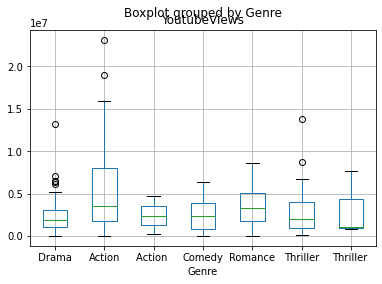

In [205]:
data.boxplot(by ='Genre', column =['YoutubeViews'], grid = True)

[]

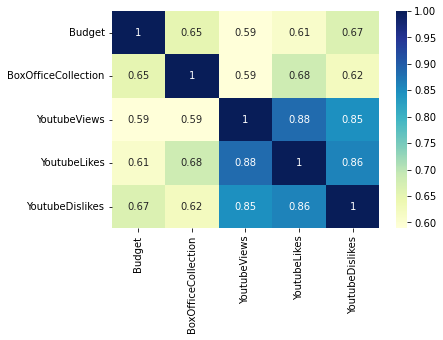

In [207]:
heatmap= sb.heatmap(data[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr(), cmap="YlGnBu", annot=True)
heatmap.plot()

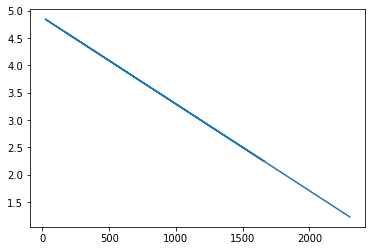

In [216]:
f= data.groupby("Genre")
g = f['BoxOfficeCollection'].sum().reset_index(name='boc')
x=g['boc']
y= g.index
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

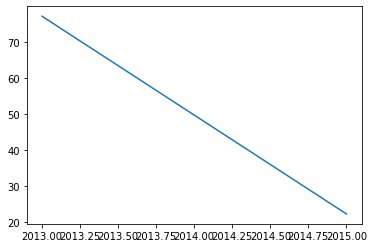

In [217]:
c = data.groupby("year")
d = c.size().reset_index(name="MoviesCount")

x=d['year']
y=d['MoviesCount']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

<BarContainer object of 7 artists>

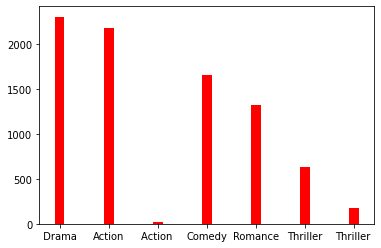

In [213]:
c = data.groupby("Genre")
d = c['BoxOfficeCollection'].sum().reset_index(name='boc')
x = d["Genre"]
y = d["boc"]
plt.bar(x,y,color = "red", width = 0.2)

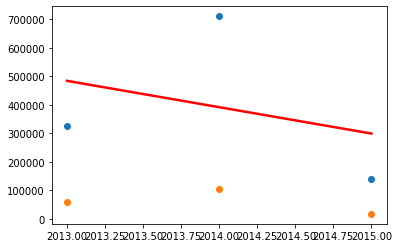

In [218]:
c = data.groupby("year")
d = c['YoutubeLikes'].sum().reset_index(name='tot')
y=d['tot']
x= d.year
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,color = 'r',linewidth = '2.5')


d = c['YoutubeDislikes'].sum().reset_index(name='totd')
z=d['totd']
plt.scatter(x, z)
m, b = np.polyfit(x, z, 1)